### The data given are the ages of 30 customers who ordered an EV scooter from Zen Automotives.ee : 
### We've used this data for answering questions 1-13.

42 44 62 35 20
30 56 20 23 41
55 22 31 27 66
21 18 24 42 25
32 50 31 26 36
39 40 18 36 22

#### Lets import the necessary packages

In [1]:
import pyforest
import scipy.stats as st
import random
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

For ease of purpose either we can convert the given data into an array/list/series.

In [2]:
ev_array=np.array([[[[[42, 44, 62, 35, 20],
[30, 56, 20, 23, 41],
[55, 22, 31, 27, 66],
[21, 18, 24, 42, 25],
[32, 50, 31, 26, 36],
[39, 40, 18, 36, 22]]]]])

<IPython.core.display.Javascript object>

In [3]:
type(ev_array)

numpy.ndarray

In [3]:
ev_list= [42, 44, 62, 35, 20, 30, 56, 20, 23, 41, 55, 22, 31, 27, 66, 21, 18, 24, 42, 25, 32, 50, 31, 26, 36, 39, 40, 18, 36,22]

In [4]:
ev_series=pd.Series(ev_list)

<IPython.core.display.Javascript object>

# QUESTIONS

#### Q1. Compute the mean, median and the mode of the data

In [6]:
mean=ev_series.mean()
print("The mean value is: ",round(mean,2))

The mean value is:  34.47


In [7]:
median=ev_series.median()
print("The median value is: ",median)

The median value is:  31.5


In [8]:
mode=ev_series.mode()
print("The mode value is: ",mode)

The mode value is:  0    18
1    20
2    22
3    31
4    36
5    42
dtype: int64


#### Q2. Compute the range , variance and standard deviation of customer ages

In [9]:
max=ev_series.max()
print("The max value is: ",max)

The max value is:  66


In [10]:
min=ev_series.min()
print("The min value is: ",min)

The min value is:  18


In [11]:
range=max-min
print("The range of customer ages: ",range)

The range of customer ages:  48


In [12]:
std_dev=ev_series.std()
print("The standard deviation value is in: ",round(std_dev,2))

The standard deviation value is in:  13.32


In [13]:
variance=np.sqrt(std_dev)
print("The variance value is: ",round(variance,2))

<IPython.core.display.Javascript object>

The variance value is:  3.65


#### Q3. Find the mean deviation for the data . The mean deviation is defined as below.

#### mean deviation is given by: |(x-xbar)|/n

In [14]:
deviations=[abs(x - mean) for x in ev_series]

In [15]:
mean_deviation = sum(deviations) / len(deviations)
print("The mean deviation is: ",round(mean_deviation,2))

The mean deviation is:  10.76


#### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

A measure to determine the skewness of a distribution is called the Pearson coefficient of skewness. The formula is:

#### skewness= 3(xbar-mean_deviation)/std_deviation

In [16]:
skewness=ev_series.skew()
print("The skew value of the age of the customers is: ",round(skewness,3))

The skew value of the age of the customers is:  0.796


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

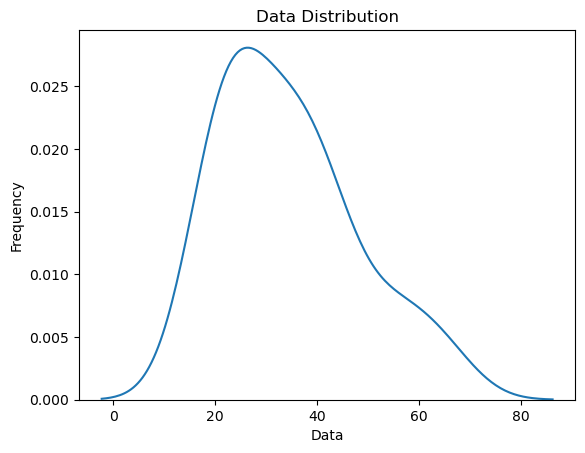

In [17]:
sns.kdeplot(ev_series)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Data Distribution')
plt.show()

#### as the skewness value is nearing 0, we can say that its not heavily skewed.

#### The value of the coefficient if skewness usually ranges from –3 to 3. When the distribution is symmetric, the coefficient is zero; when the distribution is positively skewed , the coefficient is positive, and when the distribution is negatively skewed the coefficient is negative.

#### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [18]:
lower_bound=mean-(2*std_dev) 
print("The lower_bound value is: ",round(lower_bound,2))

The lower_bound value is:  7.83


In [19]:
upper_bound=mean+(2*std_dev)
print("The upper_bound value is: ",round(upper_bound,2))

The upper_bound value is:  61.1


In [20]:
count = sum(lower_bound <= x <= upper_bound for x in ev_series)
print("Number of data values within two standard deviations:", count)

Number of data values within two standard deviations: 28


#### Q6. Find the three quartiles and the interquartile range (IQR).

In [21]:
q1= ev_series.quantile(0.25) #first quartile
q2=ev_series.quantile(0.50) #second quartile
q3= ev_series.quantile(0.75) #third quartile

In [22]:
q1

23.25

In [23]:
q2

31.5

In [24]:
q3

41.75

In [25]:
iqr=q3-q1
print("The inter-quartile range is:",iqr)

The inter-quartile range is: 18.5


#### Q7. Are there any outliers in the data set ?

In [26]:
q3+(1.5*iqr)

69.5

In [27]:
q3-(1.5*iqr)

14.0

Any IQR point greater than q3+(1.5*iqr) and less than q3-(1.5*iqr) of inter quartile range is an outlier. So, here we can see here in our dataset we dont have such values. Thus, we can say that there is no outlier.

#### Q8. Draw a boxplot of the dataset to confirm 

<IPython.core.display.Javascript object>

<Axes: >

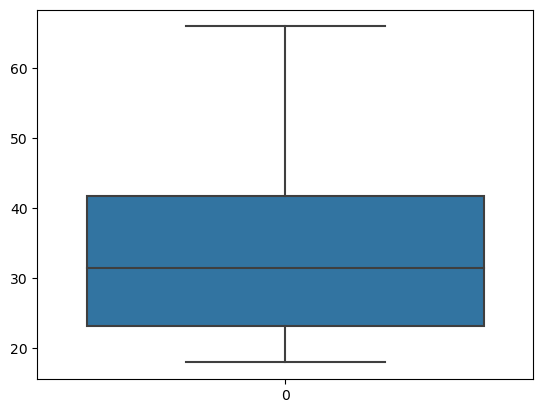

In [28]:
sns.boxplot(ev_series)

As said above we can see that there are no outliers present.

#### Q9. Find the percentile rank of the datapoint 50.

In [29]:
percentile_rank = st.percentileofscore(ev_series, 50)
print("The percentile rank is: ",round(percentile_rank,2))

The percentile rank is:  86.67


#### Q10. What is the probability that a person ordering an EV scooter is above 50 years old?

In [30]:
above_50=sum([x>50 for x in ev_series])
total=len(ev_series)

In [31]:
probability_above_50= above_50/total
print("The probability that a person ordering an EV scooter above 50 years old is: ", round(probability_above_50,2))

The probability that a person ordering an EV scooter above 50 years old is:  0.13


(or)

In [32]:
k=50
probability=st.norm.sf(k,mean,std_dev)
print("The probability is: ",round(probability,2))

The probability is:  0.12


The above method was done via stats method and as we know the mean, standard deviation values we can use the norm method.

#### Q11. Create a frequency distribution for the data and visualize it appropriately

In [33]:
ev_series.value_counts()

42    2
36    2
20    2
22    2
31    2
18    2
21    1
39    1
26    1
50    1
32    1
25    1
24    1
27    1
66    1
44    1
55    1
41    1
23    1
56    1
30    1
35    1
62    1
40    1
dtype: int64

<IPython.core.display.Javascript object>

C:\Users\arvsr\AppData\Local\Temp\ipykernel_15864\2748467508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev_list)


<Axes: ylabel='Density'>

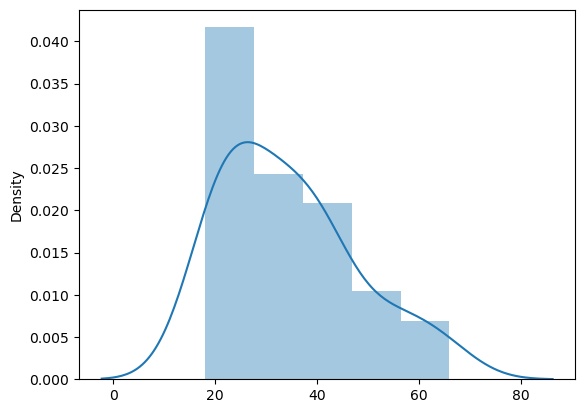

In [34]:
sns.distplot(ev_list)

#### Q12. Create a probability distribution of the data and visualize it appropriately

<IPython.core.display.Javascript object>

C:\Users\arvsr\AppData\Local\Temp\ipykernel_15864\1842732857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  prob_dist=sns.distplot(ev_list,bins=30,kde=True)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

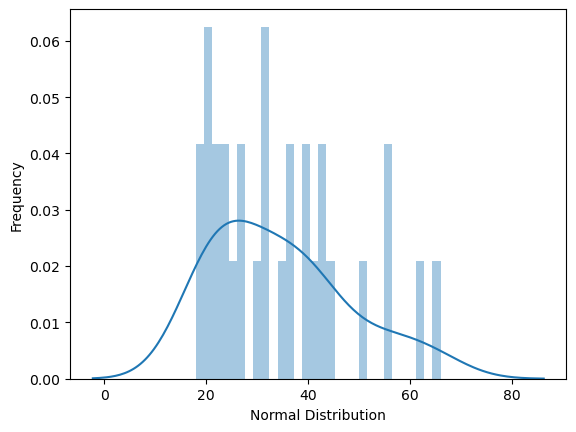

In [35]:
prob_dist=sns.distplot(ev_list,bins=30,kde=True)
prob_dist.set(xlabel='Normal Distribution', ylabel='Frequency')

#### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

In [6]:
ev_df=pd.DataFrame(ev_series)

<IPython.core.display.Javascript object>

In [7]:
ev_df.shape

(30, 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

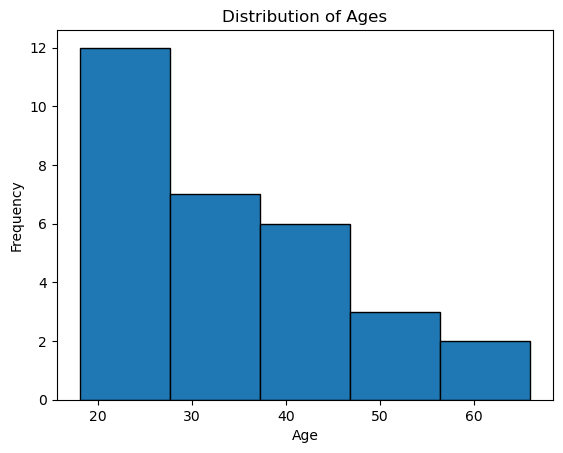

In [8]:
plt.hist(ev_list, bins=5, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

In [10]:
replace=random.choices(ev_list,k=100)
print('Sample with replacement:', replace)

Sample with replacement: [22, 39, 62, 66, 22, 32, 55, 44, 24, 36, 55, 22, 21, 36, 41, 22, 39, 26, 55, 18, 36, 62, 20, 36, 27, 50, 35, 26, 42, 36, 27, 32, 27, 35, 42, 27, 20, 40, 42, 24, 35, 44, 32, 30, 42, 56, 66, 32, 26, 20, 30, 50, 32, 39, 22, 36, 56, 30, 35, 31, 18, 56, 20, 31, 30, 40, 44, 31, 42, 23, 41, 23, 42, 24, 36, 42, 27, 32, 42, 18, 31, 18, 55, 36, 56, 24, 30, 42, 36, 31, 50, 23, 20, 41, 56, 31, 41, 62, 32, 55]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\shyam\AppData\Local\Temp\ipykernel_2524\3977577547.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

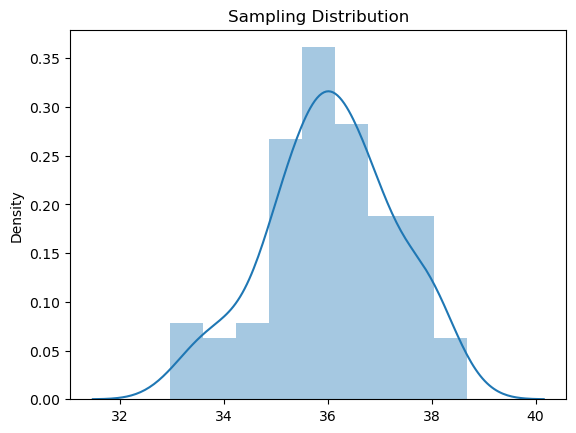

In [11]:
n=100
means = []

for i in range(n):
    sample = np.random.choice(replace, size=100, replace=True)
    sample_mean = np.mean(sample)
    means.append(sample_mean) 
sns.distplot(means)
plt.title("Sampling Distribution")
plt.show()

In [13]:
replace=random.choices(ev_list,k=10)
print('Sample with replacement:', replace)

Sample with replacement: [36, 36, 31, 35, 22, 42, 36, 22, 23, 35]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\shyam\AppData\Local\Temp\ipykernel_2524\3921328731.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

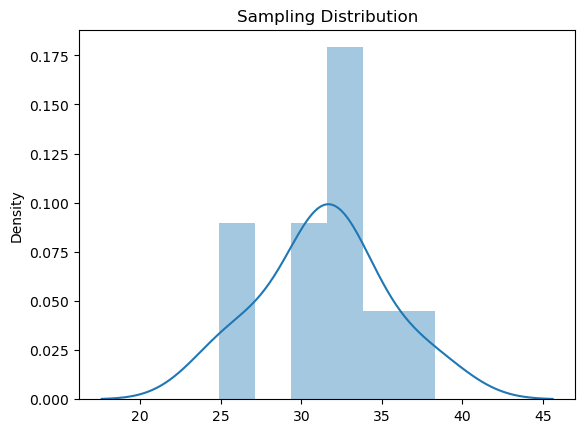

In [18]:
n=10
means = []

for i in range(n):
    sample = np.random.choice(replace, size=n, replace=True)
    sample_mean = np.mean(sample)
    means.append(sample_mean) 
sns.distplot(means)
plt.title("Sampling Distribution")
plt.show()

In [15]:
replace=random.choices(ev_list,k=15)
print('Sample with replacement:', replace)

Sample with replacement: [22, 41, 31, 62, 27, 27, 56, 20, 30, 39, 18, 50, 32, 20, 23]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\shyam\AppData\Local\Temp\ipykernel_2524\1618399324.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

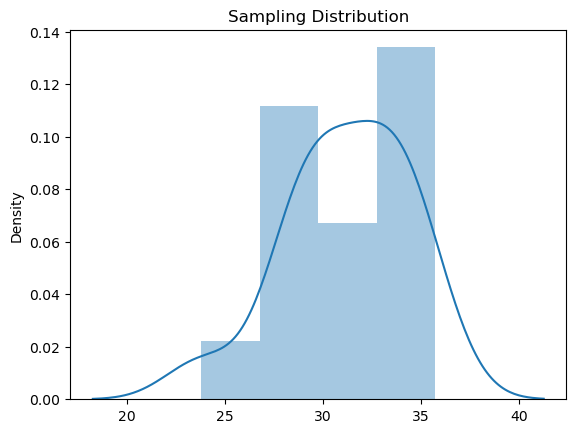

In [19]:
n=15
means = []

for i in range(n):
    sample = np.random.choice(replace, size=n, replace=True)
    sample_mean = np.mean(sample)
    means.append(sample_mean) 
sns.distplot(means)
plt.title("Sampling Distribution")
plt.show()

In [17]:
replace=random.choices(ev_list,k=20)
print('Sample with replacement:', replace)

Sample with replacement: [55, 21, 26, 27, 22, 23, 20, 18, 39, 22, 66, 62, 20, 22, 36, 50, 21, 23, 50, 39]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\shyam\AppData\Local\Temp\ipykernel_2524\3190004269.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

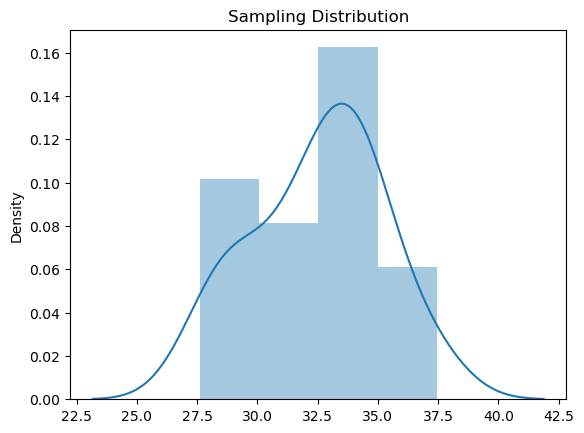

In [20]:
n=20
means = []

for i in range(n):
    sample = np.random.choice(replace, size=n, replace=True)
    sample_mean = np.mean(sample)
    means.append(sample_mean) 
sns.distplot(means)
plt.title("Sampling Distribution")
plt.show()

In [21]:
replace=random.choices(ev_list,k=25)
print('Sample with replacement:', replace)

Sample with replacement: [18, 22, 27, 21, 24, 62, 22, 27, 42, 22, 44, 27, 20, 50, 41, 20, 25, 41, 62, 27, 25, 22, 40, 42, 30]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\shyam\AppData\Local\Temp\ipykernel_2524\4028845139.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

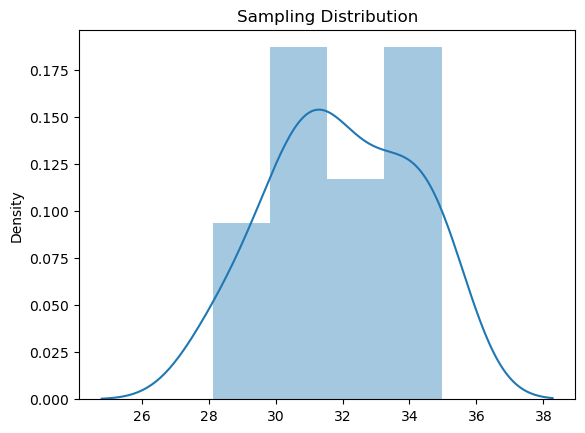

In [22]:
n=25
means = []

for i in range(n):
    sample = np.random.choice(replace, size=n, replace=True)
    sample_mean = np.mean(sample)
    means.append(sample_mean) 
sns.distplot(means)
plt.title("Sampling Distribution")
plt.show()

In [23]:
replace=random.choices(ev_list,k=30)
print('Sample with replacement:', replace)

Sample with replacement: [31, 23, 62, 20, 39, 42, 23, 36, 42, 26, 24, 31, 42, 21, 23, 36, 31, 36, 40, 31, 39, 42, 20, 66, 35, 32, 21, 42, 25, 18]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\shyam\AppData\Local\Temp\ipykernel_2524\504623767.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

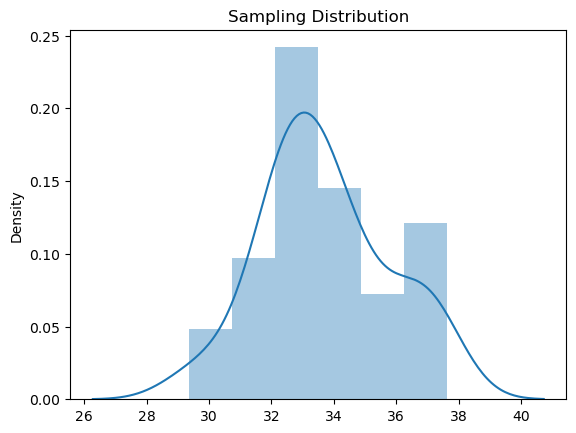

In [24]:
n=30
means = []

for i in range(n):
    sample = np.random.choice(replace, size=n, replace=True)
    sample_mean = np.mean(sample)
    means.append(sample_mean) 
sns.distplot(means)
plt.title("Sampling Distribution")
plt.show()

By comparing the sample ditributions of the sample sizes , we can conclude that This does not corroborate with the Central Limit Theorem.

#### Q14. Treat this dataset as a binomial distribution where p is the probability that a person ordering an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age?

In [44]:
greater_than_50= [i for i in ev_list if i>50]
print(greater_than_50)

[62, 56, 55, 66]


In [45]:
p= len(greater_than_50)/len(ev_list)
p

0.13333333333333333

In [46]:
k=6
n=10
p=p

probability=st.binom.pmf(k,n,p)
print("Probability:", round(probability,5))

Probability: 0.00067


The probability that exactly 6 buyers out of 10 are above 50 years of age is way less.

#### Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age.  Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [47]:
n=300
k=25
p=10/100

probability=st.binom.pmf(k=k,n=n,p=p)
print("The probability value is: ", round(probability,3))

The probability value is:  0.051


#### Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution.(State reasons as to why did you use a z or t distribution)

In [48]:
confidence=0.95
alpha=1-0.95 #0.05
n=30

In [49]:
st.shapiro(ev_series)

ShapiroResult(statistic=0.9230571985244751, pvalue=0.03221803158521652)

In the above normality test, we can see that p-value is less than the alpha value which means the given data is not normal. Which means it isnt ideal for us to use z test as per the Central Limit Theorem.

In [50]:
interval_range=st.t.interval(confidence=confidence,loc=mean,scale=std_dev/np.sqrt(n),df=n-1) #mean and std_dev calculate above
np.round(interval_range,0) #rounded off to 0 because age cannot be in decimal.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([29., 39.])

From the interval range we can see that the true mean age of the population of EV scooter buyers falls between 29 to 39 years, based on the given dataset.

#### Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [51]:
confidence=95
alpha=(1-0.95)/2

margin_of_error=0.02

p=0.2 #estimated proportion

In [52]:
z_alpha_by_2=st.norm.isf(alpha)
z_alpha_by_2

1.959963984540054

margin_of_error in proportion is given by: z_alpha_by_2 * np.sqrt(p*(1-p)/n), here, we need to know the value of n. Thus the formula will be: 

n= ((z_alpha_by_2**2)*(p*(1-p)))/(me**2)

In [53]:
value=p*(1-p)
n= ((z_alpha_by_2**2)*(value))/(margin_of_error**2)
round(n,0)

1537.0

Thus the minimum sample size of the population should be 1537.

#### Q18. The same data scientist wants to estimate the proportion of executives who own an EV. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [54]:
confidence=90
alpha=(1-0.90)/2

margin_of_error=0.05

p=0.5 #assumed estimated proportion

In [55]:
value=p*(1-p)
n= ((z_alpha_by_2**2)*(value))/(margin_of_error**2)
round(n,0)

384.0

Thus the necesaary minimum sample size is equal to 384.

#### Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV.

H0: p=0.20 (The proportion of population owning EVs is 20%)

H1: p!=0.20 (The proportion of population owning EVs is less than 20%)

In [56]:
p_samp=5/30 #hypothesised proportion
p=0.20      #sample proportion
n=30
alpha=0.05

z_proportion= (p_samp-p)/np.sqrt((p*(1-p))/n)
z_proportion

<IPython.core.display.Javascript object>

-0.4564354645876386

In [57]:
z_alpha=st.norm.isf(alpha)
z_alpha

1.6448536269514729

In [60]:
p_val=st.norm.cdf(z_proportion)
p_val

0.324038434069573

p_val is greater than alpha value so, we fail to reject H0.

In [59]:
interval=st.norm.interval(0.95,loc=p_samp,scale=np.sqrt((p*(1-p))/n))
interval

<IPython.core.display.Javascript object>

(0.02353113516929406, 0.30980219816403926)

The null hypothesis value 0.20 lies in the given interval,thus we'll fail to reject H0.

the condition to deal with hypothesis is: |z|> z_alpha --> reject H0.

Here,since |z| value is less than z_alpha, we'll fail to reject H0.

Conclusion is: Currently 20% of the population are owning EV's as claimed by the researcher.

#### Q20. Assume you are working for a Consumer Protection Agency that looks at complaints raised by customers for the transportation industry. Say you have been receiving complaints about the mileage of the latest EV launched by the Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the highway. Your results show a mean of 91.3 kmpl and a standard deviation of 14.4.

#### a. Show why you support Zen’s claim using the P-value obtained.

H0: the new EV's mileage= 96

H1: the new EV's mileage!= 96

In [41]:
# H0: mu nearly equals to 96
# Ha: mu not nearly equals to 96

alpha =0.05 #Assumptions
n = 40
mu= 96
samp_mean= 91.3
sigma= 14.4

t_stat= (samp_mean - mu) / (sigma/ np.sqrt(n))
print(t_stat)
p_value=stats.t.isf(q= 0.05, df = (n-1))
p_value

<IPython.core.display.Javascript object>

-2.0642645837210267


<IPython.core.display.Javascript object>

1.6848751194974

p_val > alpha --> fail to reject H0.

#### b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation. [Hint :use the Chi-square test for variance/standard deviation]


In [61]:
from scipy.stats import chi2

# user-defined function to get the test stat and p-value
def chi_var(pop_var, sample_var, n):
  # calculate the test statistic
  test_stat = (n - 1) * sample_var / pop_var
  # calculate the p-value
  p_value = 1 - chi2.cdf(test_stat, n-1)
  return (test_stat, p_value)

# set the value of sample size
n = 40
# set the values of population and sample variance
sigma_2, s_2 = 14.4**2, 7.2**2

test_stat, p_value = chi_var(sigma_2, s_2, n)

print('The p-value is ', p_value)

The p-value is  0.999999519703809


### Insight
As the p-value is greater than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the standard deviation of the chosen standard deviation is greater than the average standard deviation for mileage of the vehicle on the highway at 0.05 level of significance.

#### c. Write a summary of results and the action that Zen must take to remedy the complaints.

As we observerd in both the hypothesis testing , we failed to reject null hypothesis which claims that the new EVs get a mileage of 96 kmpl on the highway.But since the amount of complaint reports has been increasing so to get the full view about it, Zen must try to test the mileage  of EV vehicle in a even more larger sample to confirm their claim on it. This also considers the fact that there is not enough evidence to suggest that the variances are significantly different.

The remedy or action item to reject the null hypothesis and determine if the variances are significantly different can be by: 

1) Increasing the sample size: By increasing the sample size, the test may become more sensitive to detecting smaller differences in variances. A larger sample size can provide more precise estimates of variances and increase the power of the test.

2) Consider the context and practical significance: Even if the test fails to reject the null hypothesis, it's important to consider the practical significance of the differences in variances. If the variances are very close but statistically not significantly different, it may not have a practical impact. Understanding the context and the implications of the variances can help determine if further action is necessary.

3) If all else fails or if Zen is unsure about the appropriate course of action, it is recommended to seek the advice of a statistician or an expert in the field. They can provide guidance on how to proceed and suggest alternative approaches to address the research question.

#### d. What is your position on performing the test for variability along with the test for means?

The test for means, typically done using t-tests or analysis of variance (ANOVA), is used to compare the means of two or more groups or samples. It determines if there is a statistically significant difference between the means, indicating that the groups are not identical.

The test for variability, typically done using analysis of variance (ANOVA) or tests like Levene's test or Bartlett's test, assesses the homogeneity or equality of variances across multiple groups or samples. It determines if there are substantial differences in variability among the groups being compared. Here, we did it by using chi2 method and cannot see any changes in the claims made during hypothesis testing.

Including both tests allows for a thorough analysis of the data. The test for means primarily focuses on differences in central tendency (mean), while the test for variability examines differences in dispersion (variance). By performing both tests, one can better understand the overall patterns and characteristics of the data.

In [ ]:
##mean values output from graphs above in qn 13 --> 2 lines

#### Q21. Write a report comparing and contrasting Descriptive vs Inferential Statistics in about 200-500 words and how each helps to get more insight into the data at hand.

Descriptive statistics and inferential statistics are two branches of statistical analysis that serve distinct purposes in understanding and interpreting data. 

While descriptive statistics focus on summarizing and describing the characteristics of the data, inferential statistics draw conclusions and make predictions based on that data. Both approaches have their benefits and contribute to gaining deeper insights into the data at hand.

Descriptive statistics involve the organization, presentation, and interpretation of data. It provides a clear and concise summary of the main features of a dataset, such as measures of central tendency (mean, median, and mode), measures of dispersion (standard deviation, range, and interquartile range), and graphical representations (histograms, box plots, and scatter plots). Descriptive statistics allow us to get an initial understanding of the data by quantifying its properties and visually representing them. These statistics are useful for describing patterns, trends, and general characteristics of the dataset.

Descriptive statistics would help to summarize this data given by calculating the mean age, the standard deviation, and constructing a histogram to visualize the distribution of age groups who ordered/bought EV vehicles. By doing so, we can gain a quick overview of the average age group of people choosing EV vehicles or the variation in their choices, and the shape of the distribution of the dataset.

On the other hand, inferential statistics focus on drawing conclusions and making inferences about a larger population based on a sample of data. It involves using probability theory and sampling techniques to make generalizations about a population from a smaller subset of data. Inferential statistics utilize hypothesis testing, confidence intervals, and regression analysis to make predictions and draw meaningful conclusions about a population's characteristics without examining the entire population.

The inferential statistics here and helped us to make predictions about the overall age of the people in a sample or even the entire population. By sampling a subset of customers and calculating confidence intervals, we can estimate the average age of the group of customers , determine the significance of any differences observed, and draw conclusions about the entire population and their proportions based on this sample.

By combining both methods, researchers and analysts can gain a deeper understanding of the data, uncover hidden patterns, and make informed decisions based on the insights gained and to the betterment of the project.